<a href="https://colab.research.google.com/github/dataxalco/Whatsapp-data-extraction/blob/main/MyLinearRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis with Google Colab**

## **Introduction**

This notebook provides a template for data analysis using Google Colab. The notebook walks through the steps of:
1. Uploading a Google Sheet from Google Drive.
2. Performing data cleaning.
3. Conducting a linear regression analysis.

This notebook will serve as a reference, so feel free to revisit it anytime.

For this workbook we'll be using the [Movies](https://docs.google.com/spreadsheets/d/1DQ6xFmmZYCwIJZiUgD9n3Pp1xRaAE7zEkj7It1iV5eA/edit?usp=sharing) dataset.

## **1. Uploading a Google Sheet from Google Drive**

To work with data stored in Google Sheets, we need to connect our Colab environment to Google Drive.

**Step 1: Authenticate and Connect to Google Drive**

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import numpy as np

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Step 2: Load Data from a Google Sheet**

1.	Go to your Google Sheet, and in the URL, find the sheet_id:

  *   Example URL: https://docs.google.com/spreadsheets/d/your_sheet_id/edit#gid=0

  *   The sheet_id is the part that comes after /d/ and before /edit.
2.	Replace 'your_sheet_id' in the code below with your actual sheet ID.

In [ ]:
# Replace 'your_sheet_id' with your actual Google Sheet ID
sheet_id = '1DQ6xFmmZYCwIJZiUgD9n3Pp1xRaAE7zEkj7It1iV5eA'
sheet = gc.open_by_key(sheet_id)

# Select the first sheet (worksheet) in the Google Sheet
worksheet = sheet.get_worksheet(0)

# Convert the worksheet to a pandas DataFrame
data = pd.DataFrame(worksheet.get_all_records())

## **2. Data Cleaning**

Once the data is loaded into a DataFrame, we can clean it. This involves handling missing values, removing duplicates, and ensuring data types are correct.

**Step 1: Overview of the Data**

In [ ]:
# Display the first few rows of the DataFrame
data.head()

,Duration,DirectorFacebookLikes,CastTotalFacebookLikes,Rating,Budget,Year,Drama,Comedy,Romance,Action,Adventure,Mystery,Fantasy,Crime,SciFi,Thriller,Family,AvgDirectorScore,AvgActorScore,IMDbScore
0,123,126,25661,PG-13,35000000.0,2008,1,0,0,0,0,0,0,1,0,1,0,5.77,7.34,6.8
1,128,241,16911,PG-13,40000000.0,2013,1,0,0,0,0,0,0,0,0,0,0,6.37,7.02,7.5
2,158,776,2144,PG-13,200000000.0,2009,0,0,0,1,1,0,0,0,1,0,0,6.80,6.51,5.8
3,102,23,7009,PG-13,20000000.0,2009,1,1,1,0,0,0,1,0,0,0,1,7.00,6.28,6.4
4,109,97,19968,R,42000000.0,2012,0,1,0,1,0,0,0,1,0,0,0,7.00,6.01,7.2


In [ ]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Duration                318 non-null    int64  
 1   DirectorFacebookLikes   318 non-null    int64  
 2   CastTotalFacebookLikes  318 non-null    int64  
 3   Rating                  318 non-null    object 
 4   Budget                  318 non-null    float64
 5   Year                    318 non-null    int64  
 6   Drama                   318 non-null    int64  
 7   Comedy                  318 non-null    int64  
 8   Romance                 318 non-null    int64  
 9   Action                  318 non-null    int64  
 10  Adventure               318 non-null    int64  
 11  Mystery                 318 non-null    int64  
 12  Fantasy                 318 non-null    int64  
 13  Crime                   318 non-null    int64  
 14  SciFi                   318 non-null    in

**Step 2: Handling Missing Values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for empty values
empty_strings = (data == '').sum()
print("Empty strings in each column:\n", empty_strings)
data.replace('', np.nan, inplace=True)

# Option 1: Drop rows with missing values
data_cleaned = data.dropna()

# Option 2: Fill missing values with a default value (e.g., the mean)
# data_cleaned = data.fillna(data.mean())

Missing values in each column:
 Duration                  0
DirectorFacebookLikes     0
CastTotalFacebookLikes    0
Rating                    0
Budget                    0
Year                      0
Drama                     0
Comedy                    0
Romance                   0
Action                    0
Adventure                 0
Mystery                   0
Fantasy                   0
Crime                     0
SciFi                     0
Thriller                  0
Family                    0
AvgDirectorScore          0
AvgActorScore             0
IMDbScore                 0
dtype: int64
Empty strings in each column:
 Duration                  0
DirectorFacebookLikes     0
CastTotalFacebookLikes    0
Rating                    0
Budget                    0
Year                      0
Drama                     0
Comedy                    0
Romance                   0
Action                    0
Adventure                 0
Mystery                   0
Fantasy                   0


**Step 3: Removing Duplicates**

In [ ]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Confirm that duplicates have been removed
print(f"Number of duplicate rows: {data_cleaned.duplicated().sum()}")

Number of duplicate rows: 0


**Step 4: Data Type Conversion (if needed)**

In [ ]:
# Convert columns to appropriate data types
# Example: data_cleaned['column_name'] = data_cleaned['column_name'].astype(int)

## **3. Linear Regression Analysis**

Now that the data is cleaned, we can perform a linear regression analysis.

**Step 1: Select Features and Target Variable**

In [ ]:
# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
X = data_cleaned[['Budget']]
y = data_cleaned['IMDbScore']

**Step 2: Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Perform Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

**Step 4: Evaluate the Model**

Below are explanations for **R-squared** and **Mean Squared Error (MSE)**.

#### **R-squared (R²)**

**What is R-squared?**
R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent (target) variable that is predictable from the independent (predictor) variables. In simpler terms, it tells you how well your model explains the variability of the target variable based on the input features.

**How to Interpret R-squared?**
- **R-squared = 1**: The model perfectly explains all the variability of the target variable. This is the ideal scenario, but it's rare in practice.
- **R-squared = 0**: The model does not explain any of the variability of the target variable. This means the model fails to capture the relationship between the predictors and the target.
- **R-squared between 0 and 1**: The model explains a certain percentage of the variability. For example, an R-squared of 0.75 means that 75% of the variability in the target variable can be explained by the model, while the remaining 25% is unexplained.

**Why is R-squared Important?**
R-squared gives you an idea of the goodness of fit of your model. A higher R-squared value generally indicates a better fit, but it’s important to note that a very high R-squared might also suggest overfitting, especially in complex models.

---

#### **Mean Squared Error (MSE)**

**What is Mean Squared Error?**
Mean Squared Error (MSE) is a measure of the average squared difference between the actual values and the values predicted by your model. It calculates the error by taking the difference between each actual and predicted value, squaring it, and then averaging these squared differences.

**How to Interpret MSE?**
- **Lower MSE**: Indicates that the model’s predictions are closer to the actual values, meaning the model is performing well.
- **Higher MSE**: Suggests that the predictions are far from the actual values, meaning the model may not be capturing the underlying relationship well.

**Why is MSE Important?**
MSE gives you a sense of the accuracy of your model’s predictions. Since it squares the differences between actual and predicted values, it penalizes larger errors more heavily, making it a sensitive measure of model performance. However, it’s important to remember that MSE is in the units of the target variable squared, which can make interpretation tricky if you're comparing models or datasets.

**Key Difference Between MSE and R-squared:**
- **MSE** is an absolute measure of prediction error in the original units of the target variable.
- **R-squared** is a relative measure that tells you the proportion of variance explained by the model.

Both R-squared and MSE are critical metrics for evaluating the performance of a linear regression model, and together they provide a comprehensive picture of how well your model is doing.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.7101545673080232
R-squared: 0.022044033777463667


**Step 5: Visualize the Results**

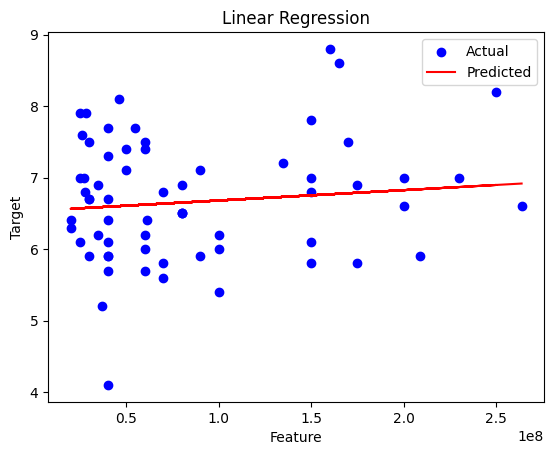

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

## **4. Advanced: Multi-variate Linear Regression Analysis**

Now that we've done basic linear regression analysis with one x and one y variable ("how does x predict y?"), we'll see how to use multiple x variables to predict.

**Step 1: Select Features and Target Variable**

In [ ]:
# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
data_cleaned = pd.get_dummies(data_cleaned, columns=['Rating'], drop_first=True)
X = data_cleaned[['Budget'] + [col for col in data_cleaned.columns if 'Rating' in col]]
y = data_cleaned['IMDbScore']

**Step 2: Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Perform Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

**Step 4: Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.6838234094537098
R-squared: 0.05830474955203957


**Step 5: Visualize the Results**

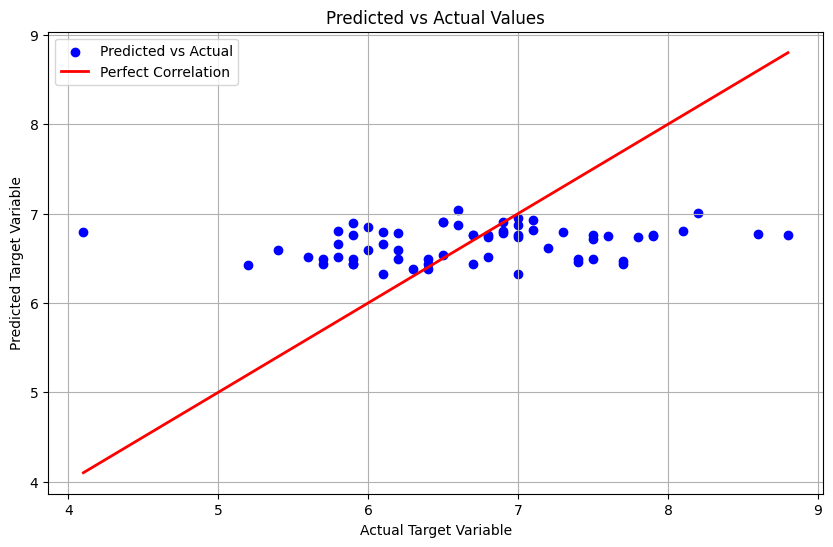

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Correlation')
plt.xlabel('Actual Target Variable')
plt.ylabel('Predicted Target Variable')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()